In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

In [39]:
# Load train.csv and test.csv
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [40]:
train_data.shape
#test_data.shape

(30161, 14)

In [41]:
test_data.shape

(15060, 14)

In [42]:
# Display the first few rows of the train and test datasets to understand the structure
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  


In [43]:
train_data.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [45]:
# Perform label encoding for categorical variables
#Label Encoding the obj Dtypes trainig data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in train_data.select_dtypes(include=["object"]):
    train_data[column] = LE.fit_transform(train_data[column])
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [46]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in test_data.select_dtypes(include=["object"]):
    test_data[column] = LE.fit_transform(test_data[column])
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [49]:
#choosing X and Y variables for train data
y_train=train_data["Salary"]
#y_train.head()
x_train=train_data.iloc[:,0:-1]
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [50]:
#choosing X and Y variables for test data
y_test=test_data["Salary"]
#y_train.head()
x_test=test_data.iloc[:,0:-1]
x_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37


In [51]:
#standardization will fit the values b/w -3 to +3
#applying for training data
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x_train = SS.fit_transform(x_train)
SS_x_train = pd.DataFrame(SS_x_train)
#giving columns names to the converted data
SS_x_train.columns = list(x_train)
SS_x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,2.935947,-0.349827,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358
1,0.880261,1.887645,-0.349827,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358
2,-0.033356,-0.208958,0.174805,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,1.108665,-0.208958,-2.448354,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
4,-0.794703,-0.208958,-0.349827,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965


In [52]:
#standardization will fit the values b/w -3 to +3
#applying for test data
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x_test = SS.fit_transform(x_test)
SS_x_test = pd.DataFrame(SS_x_test)
#giving columns names to the converted data
SS_x_test.columns = list(x_test)
SS_x_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.029005,-0.222347,-2.423439,-1.216563,0.933187,0.002725,1.006108,-2.034389,0.695832,-0.145438,-0.219169,-0.078889,0.260581
1,-0.057423,-0.222347,0.190172,-0.434898,-0.395463,-0.494789,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
2,-0.804794,-1.257126,-0.855272,0.737599,-0.395463,0.997755,-0.881990,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
3,0.391000,-0.222347,1.235617,-0.044066,-0.395463,0.002725,-0.881990,-2.034389,0.695832,0.852624,-0.219169,-0.078889,0.260581
4,-0.356371,-0.222347,-2.684800,-1.607395,0.933187,0.251483,-0.252624,0.382230,0.695832,-0.145438,-0.219169,-0.907909,0.260581


In [54]:
# Fitiing model
# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(SS_x_train, y_train)

# Predict the labels for the test dataset
y_pred_test = naive_bayes_classifier.predict(SS_x_test)

# Predict the labels for the test dataset
y_pred_train = naive_bayes_classifier.predict(SS_x_train)

# Calculate the accuracy of the model
accuracy_1 = accuracy_score(y_train, y_pred_train)
accuracy_2 = accuracy_score(y_test, y_pred_test)
print("Accuracy of Naive Bayes classifier for Train Data ", accuracy_1)
print("Accuracy of Naive Bayes classifier for Test Data ", accuracy_2)
print("Variance of Naive Bayes classifier for Train and  Test Data", (accuracy_1 - accuracy_2).round(3))


Accuracy of Naive Bayes classifier for Train Data  0.797586286926826
Accuracy of Naive Bayes classifier for Test Data  0.798804780876494
Variance of Naive Bayes classifier for Train and  Test Data -0.001


In [57]:
#cross validation by Naive Bayes classifier
#cross validation method for taining data
#validation set approach
from sklearn.model_selection import cross_val_score
training_accuracy = []
test_accuracy = []
# Define the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Perform cross-validation with 100 folds
scores = cross_val_score(naive_bayes_classifier, SS_x_train, y_train, cv=100)

# Appending to the cross-validation scores
training_accuracy.append(scores)
ac1=np.mean(training_accuracy)
print("Mean  Trainig Accuracy:",ac1)

# Evaluate the model on the test dataset
accuracy_test = accuracy_score(y_test, y_pred_test)
test_accuracy.append(accuracy_test)
ac2=np.mean(test_accuracy)
print("Mean  Test Accuracy:",ac2)

# Calculate and print the Variance of the model
print("Variance of Naive Bayes classifier for Train and  Test Data", (ac1 - ac2).round(3))


Mean  Trainig Accuracy: 0.7976198543486394
Mean  Test Accuracy: 0.798804780876494
Variance of Naive Bayes classifier for Train and  Test Data -0.001


In [ ]:
# My Naive Bayes classifier predicting almost 79% with negligible variance between trainig data and Test data

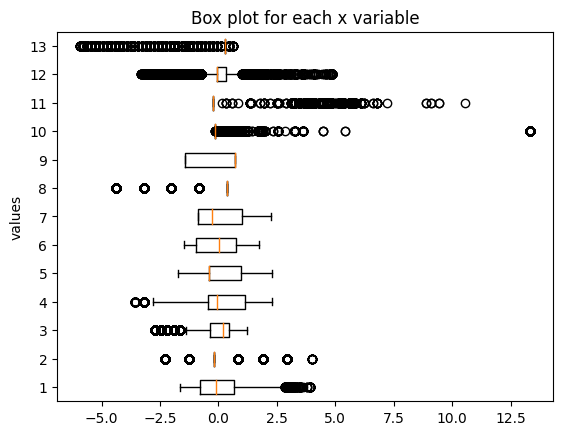

In [58]:
#-------------------Univariate analysis-----------------------------------------------
#constructing box plot  for all x_variables value counts of trainig data
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x_train,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

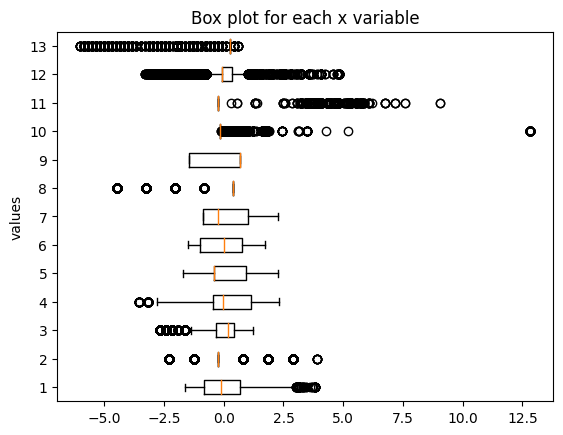

In [59]:
#-------------------Univariate analysis-----------------------------------------------
#constructing box plot  for all x_variables value counts of test data
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x_test,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'maritalstatus'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>,
        <Axes: title={'center': 'hoursperweek'}>],
       [<Axes: title={'center': 'native'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

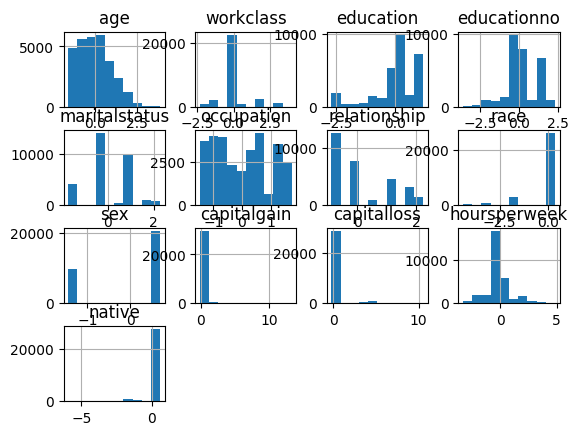

In [60]:
#-------------------Univariate analysis-----------------------------------------------
#constructing histogram for all x_variables of Training data value counts
SS_x_train.hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'maritalstatus'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>,
        <Axes: title={'center': 'hoursperweek'}>],
       [<Axes: title={'center': 'native'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

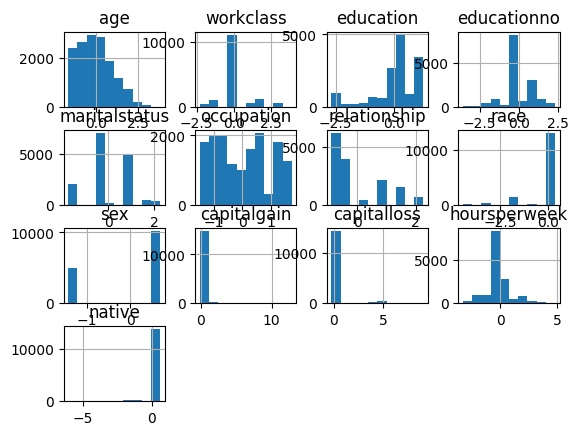

In [61]:
#-------------------Univariate analysis-----------------------------------------------
#constructing histogram for all x_variables of Test data value counts
SS_x_test.hist()

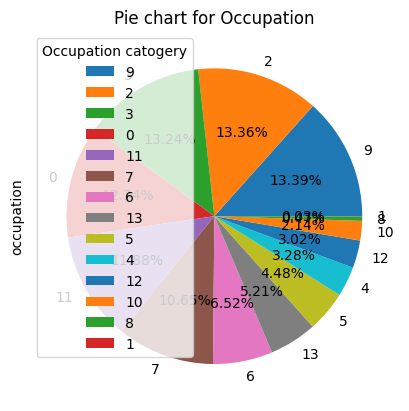

In [62]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for occupation variable value counts for Training Data

import matplotlib.pyplot as plt
train_data['occupation'].value_counts().plot(kind='pie',autopct='%1.2f%%')
#autopct='%1.2f%%' ----> it gives what % of single catogery occupied on entire
plt.legend(title="Occupation catogery") #gives which color is for which one
plt.title("Pie chart for Occupation Trainig ")
plt.show()


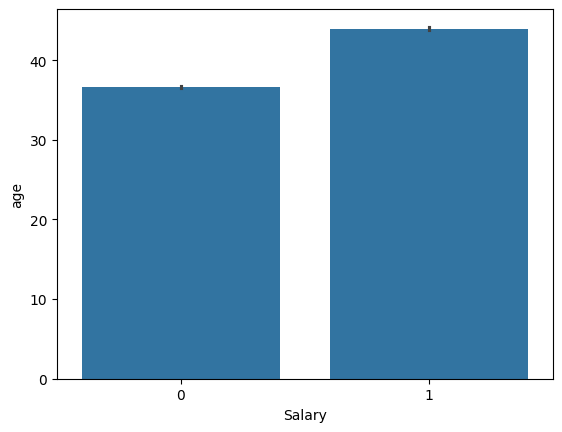

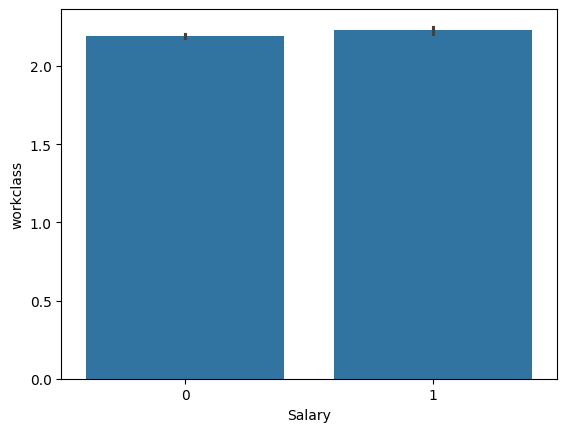

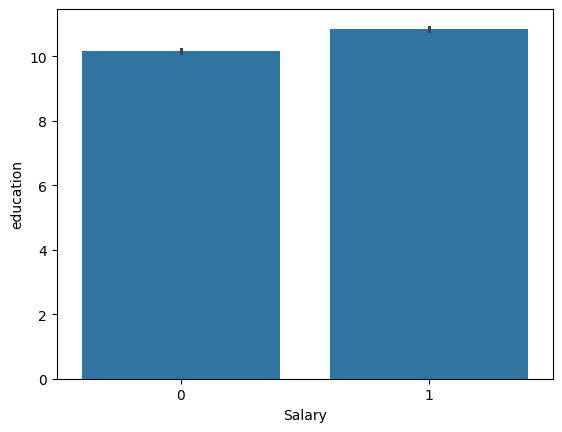

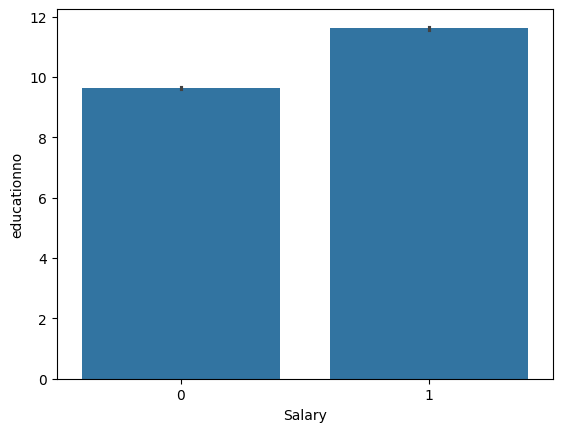

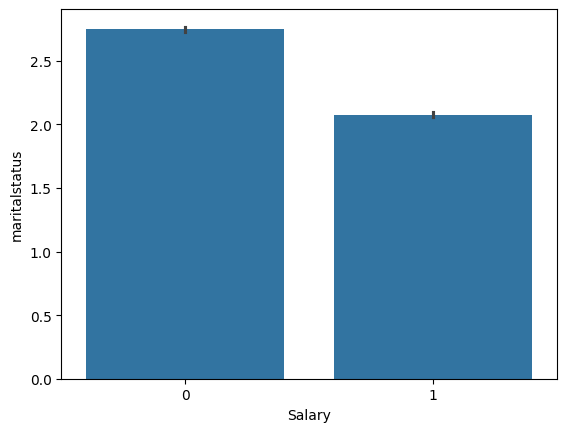

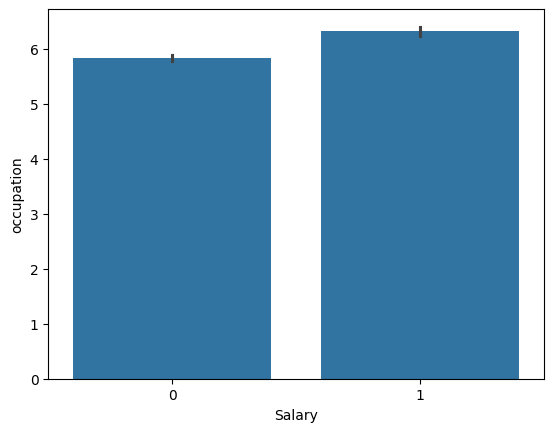

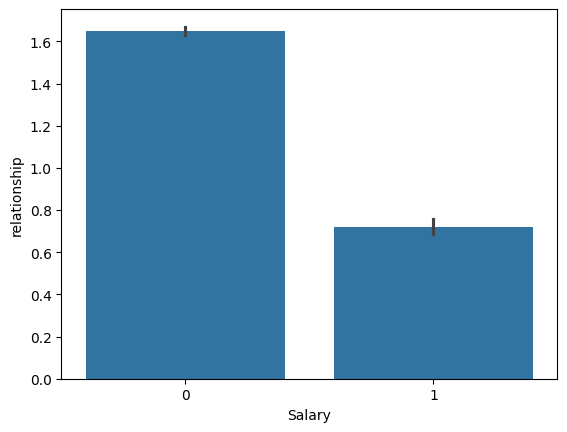

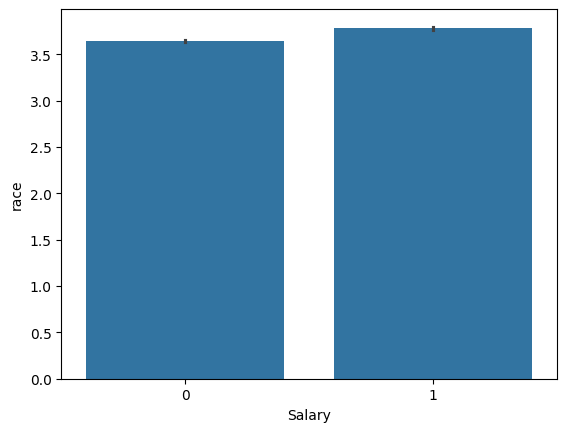

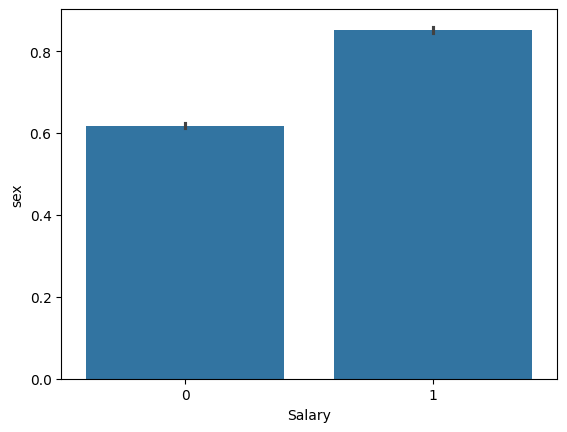

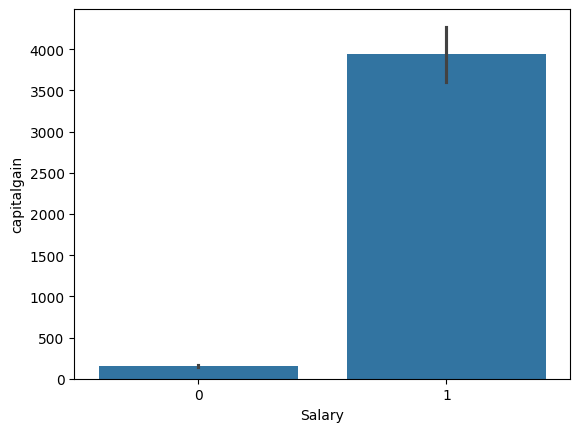

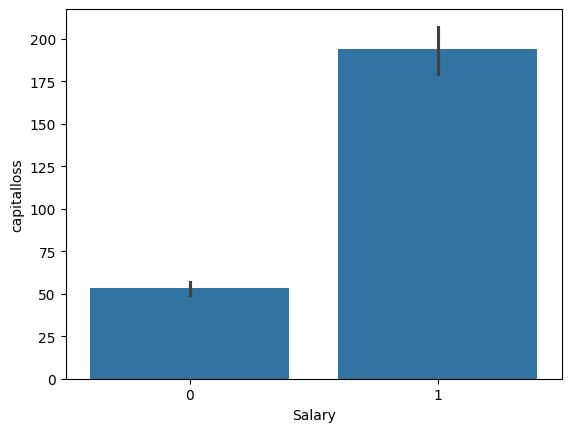

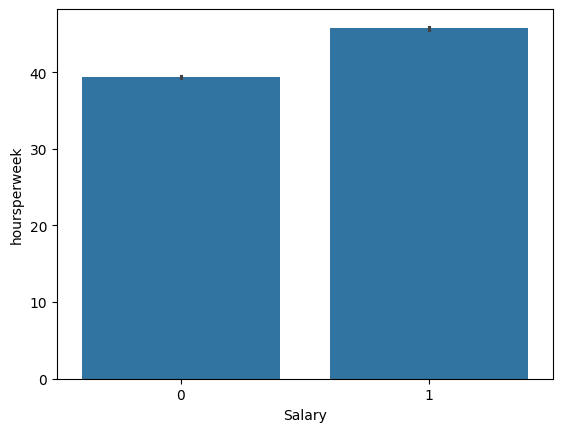

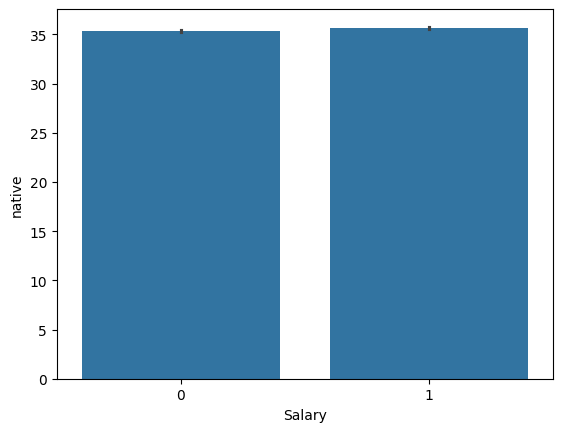

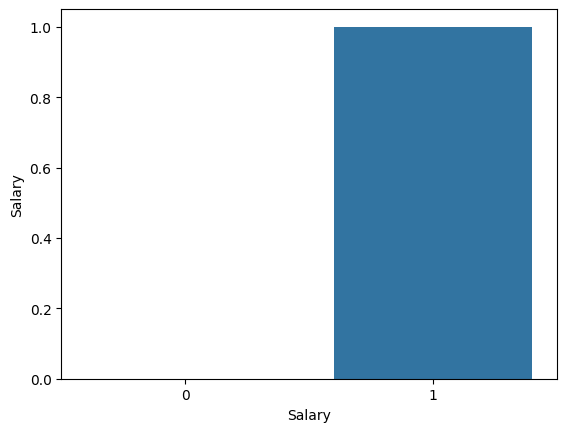

In [63]:
##Bar graph for every x- variable with Salary in training Data

import matplotlib.pyplot as plt
import seaborn as sns
for column in train_data.select_dtypes(include=["int64"]):
  sns.barplot(x=train_data['Salary'], y=train_data[column])
  plt.show()


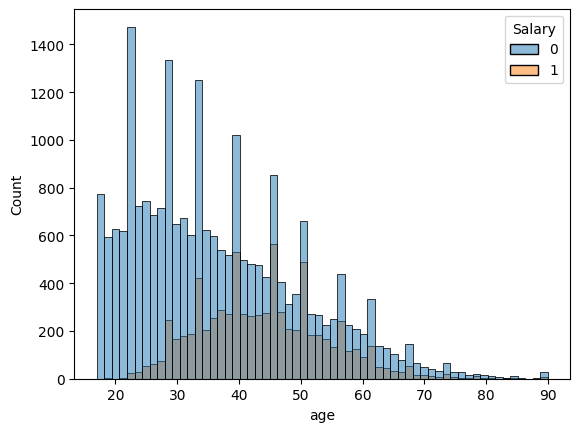

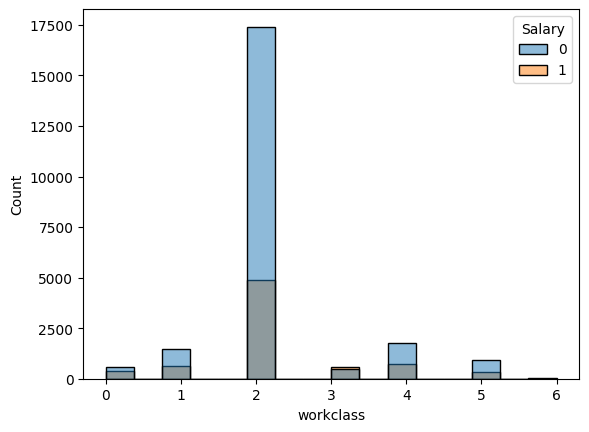

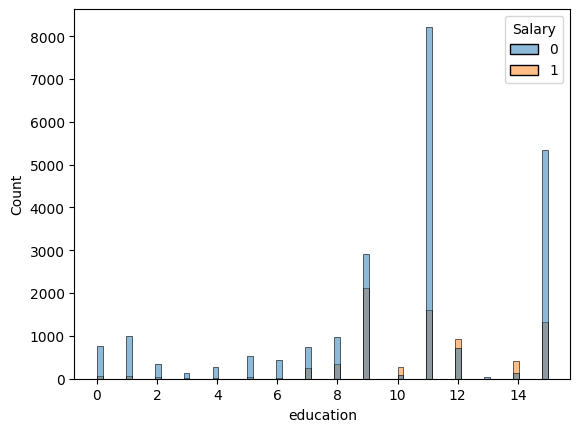

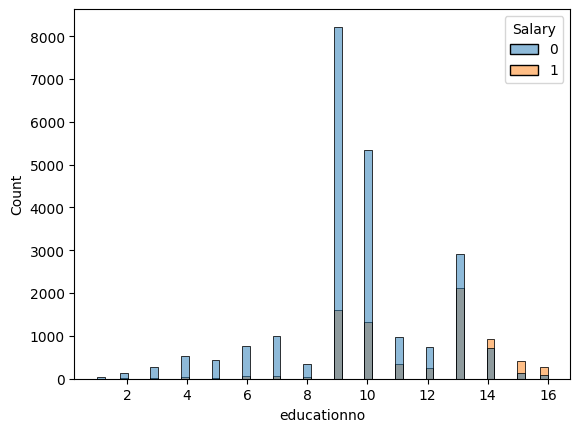

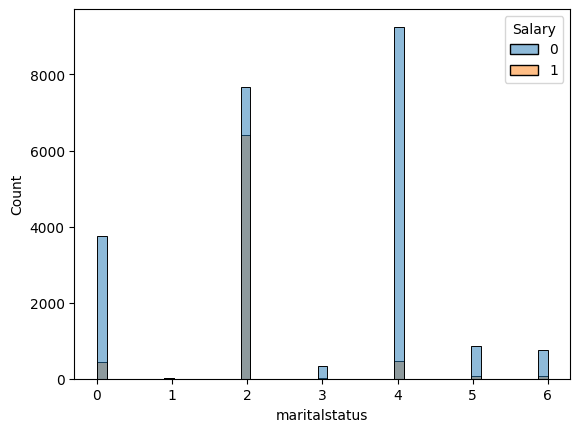

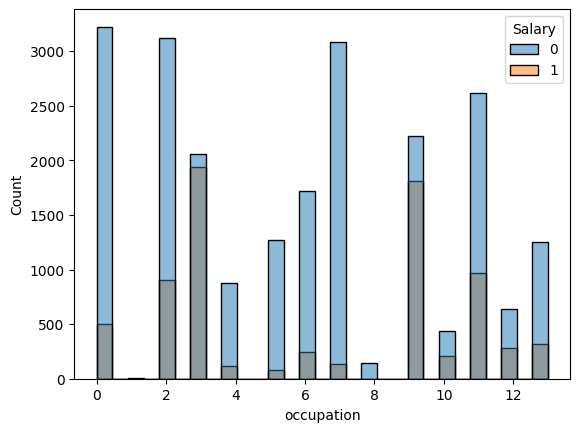

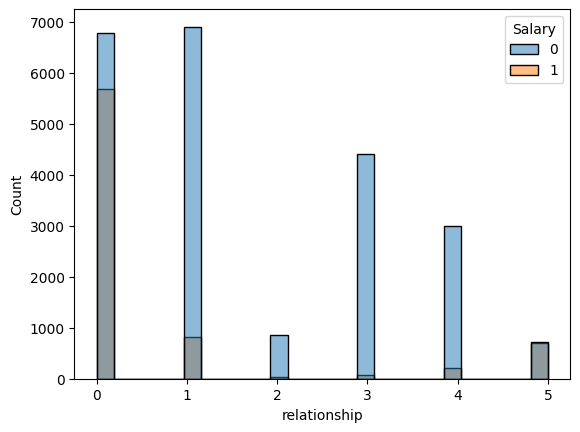

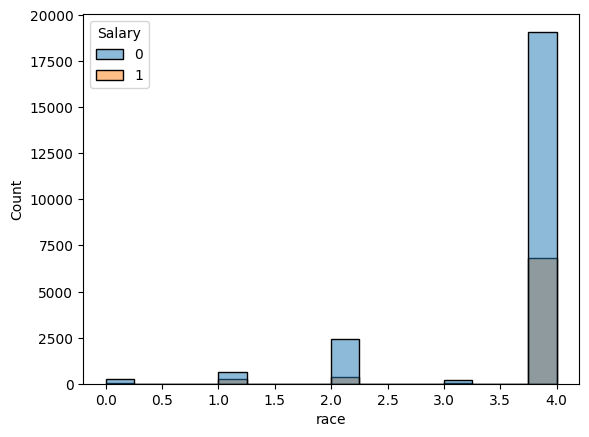

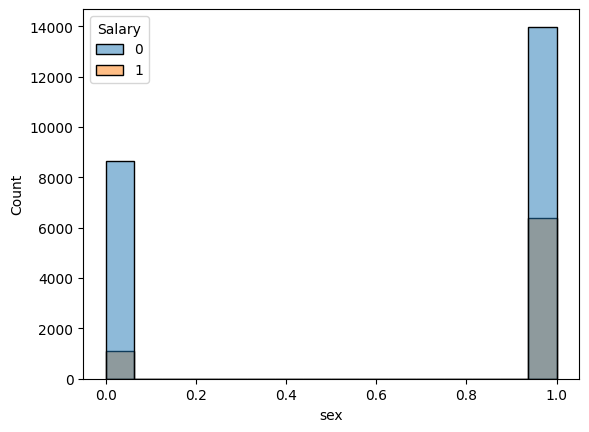

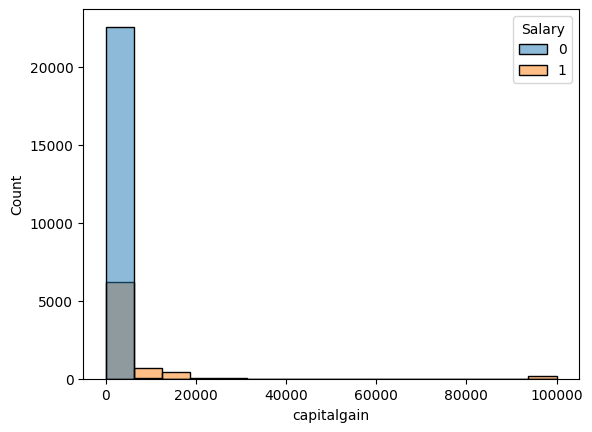

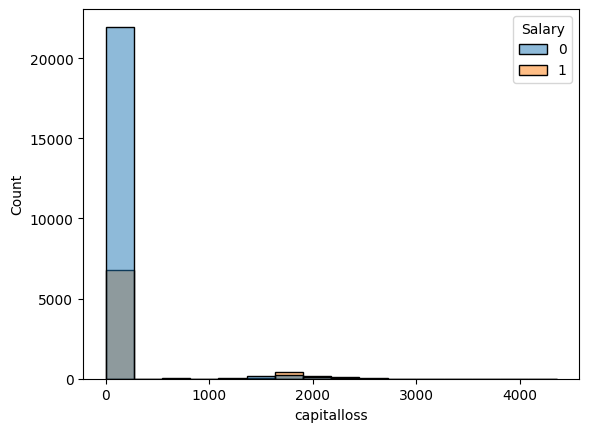

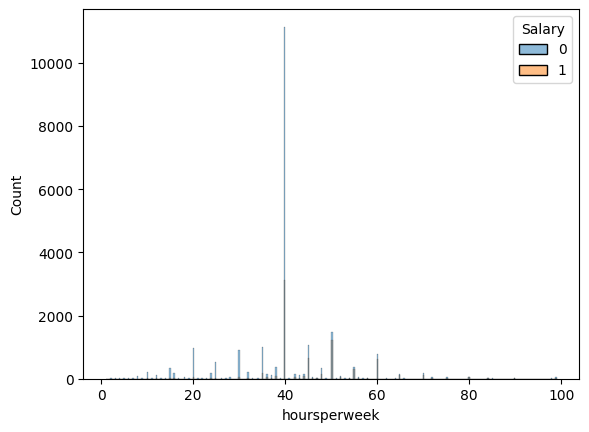

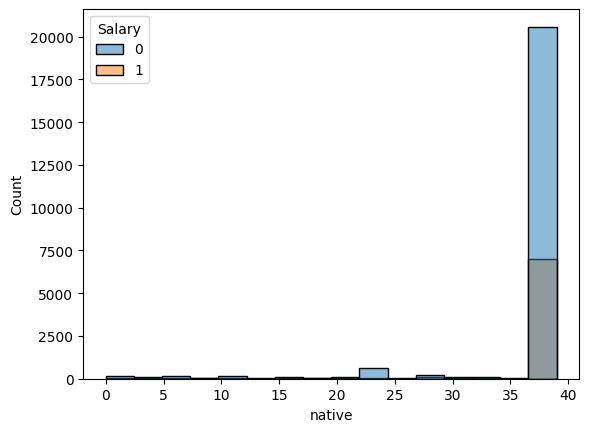

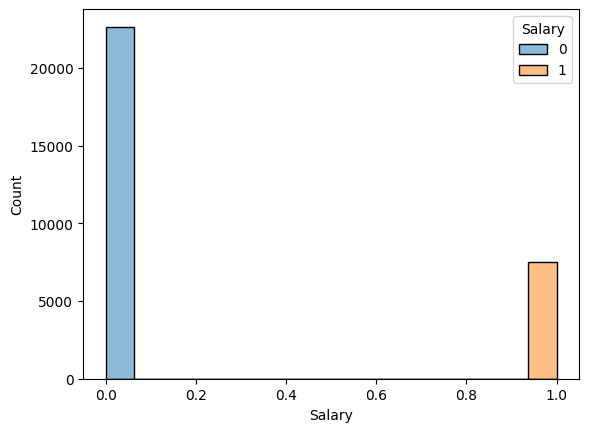

In [64]:
#---------------Bivariate analysis-----------------------------------------------------
#constructiing the histogram plot for all X variables  of trainig data based on Salary
import seaborn as sns
#Histogram for each feature with Salary
for column in train_data.select_dtypes(include=["int64"]):
    sns.histplot(x=train_data[column], hue=train_data['Salary'])
    plt.show()

In [ ]:
#------------------------Rough work codes-----------------------------------------------------------------

#Investigate the workclass column:
#test_data['workclass'].value_counts()

#Fit the LabelEncoder on the workclass column of the training data:
#label_encoder.fit(train_data['workclass'])

#test_data['workclass'] = label_encoder.transform(test_data['workclass'])

##Removing the fillers with replace command
#test_data['workclass'] = test_data['workclass'].replace(' Private', 'Private')

#Investigate the workclass column:
#test_data['workclass'].value_counts()